In [39]:
import sys
sys.dont_write_bytecode = True
print("Set __pycache__ disabled.")

from preprocessing import *
from time import sleep
from os import listdir
import numpy as np
import matplotlib.pyplot as plt

#from keras.api.models import Sequential
#from keras.api.layers import Flatten, Dense
#from keras.api.optimizers import Adagrad
#from keras.api.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.models import Sequential  # type: ignore
from tensorflow.keras.layers import Flatten, Dense, LSTM, Dropout, Embedding  # type: ignore
from tensorflow.keras.regularizers import L2  # type: ignore
from tensorflow.keras import optimizers  # type: ignore
from tensorflow.keras.utils import to_categorical  # type: ignore

gpus = tf.config.list_physical_devices('GPU')
print("GPUs detected: ",gpus)
print("Successfully imported.")

Set __pycache__ disabled.
GPUs detected:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Successfully imported.


In [40]:
import os
os.system("pwd")
os.system(command="python3 preprocessing.py")

/home/yegekucuk/Documents/Projects/story-creator
Set __pycache__ disabled.
Library loaded
Number of stories used: 10
0.txt done.
1.txt done.
2.txt done.
3.txt done.
4.txt done.
5.txt done.
6.txt done.
7.txt done.
8.txt done.
9.txt done.
Successfully created the file in dictionary/dictionary.txt


0

In [41]:
# Loading the dictionary
dictionary_list = load_dictionary()

Dictionary is loaded successfully.


In [42]:
# Creating stories[][]
scripts = []

for j in range(NUM_STORIES):
    with open(f"./dataset-encrypted/{j}.txt","r") as file:
        scripts.append(list(map(int,list(file.read().splitlines()))))
        file.close()

# Turning int to [int]
def func(liste):
    return [[x] for x in liste]
scripts = list(map(func,scripts))

print(scripts)

[[[398], [148], [19], [409], [85], [33], [0], [209], [360], [298], [606], [38], [61], [571], [298], [394], [393], [682], [113], [262], [310], [298], [412], [270], [134], [424], [608], [262], [401], [550], [407], [674], [262], [564], [33], [593], [85], [365], [201], [526], [339], [262], [660], [486], [595], [414], [122], [262], [633], [593], [85], [258], [11], [593], [669], [37], [578], [262], [660], [0], [76], [7], [563], [285], [270], [409], [504], [33], [207], [298], [660], [230], [61], [262], [377], [593], [435], [262], [116], [368], [538], [596], [478], [593], [431], [660], [41], [61], [593], [231], [362], [383], [262], [523], [593], [85], [222], [398], [494], [612], [593], [453], [75], [56], [675], [262], [116], [44], [21], [675], [262], [660], [244]], [[359], [256], [17], [44], [196], [62], [376], [61], [528], [256], [394], [282], [592], [414], [100], [74], [593], [102], [408], [266], [337], [674], [528], [223], [19], [409], [419], [374], [33], [0], [209], [360], [528], [101], [5

In [43]:
# To categorical -> [0,0,0,...,1,...0,0,0]
for j in range(NUM_STORIES):
    scripts[j] = to_categorical(scripts[j],num_classes=len(dictionary_list))

print(scripts)

[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[0., 0., 0., ..., 0., 0.

In [44]:
# Creating inputs and outputs lists
inputs = []
outputs = []
for j in range(NUM_STORIES):
    inputs.append(None)
    outputs.append(None)

# Creating sublists
for j in range(NUM_STORIES):
    inputs[j],outputs[j] = create_sublists(scripts[j], WINDOW_SIZE)

# Removing [stories] layer in lists aka. flattening
# [[1],[2],[3]] -> [1,2,3]
inputs_temp = []
for j in range(NUM_STORIES):
    for k in range(len(inputs[j])):
        inputs_temp.append(inputs[j][k])
inputs = inputs_temp
del inputs_temp

outputs_temp = []
for j in range(NUM_STORIES):
    for k in range(len(outputs[j])):
        outputs_temp.append(outputs[j][k])
outputs = outputs_temp
del outputs_temp

x_train = np.asarray(inputs)
y_train = np.asarray(outputs)

In [45]:
# # Creating train data and test data, x is for input and y is for output
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3, random_state=42)
# 
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
# x_test = np.asarray(x_test)
# y_test = np.asarray(y_test)

In [46]:
print(f"Training data shape: {x_train.shape}, {y_train.shape}")
print(f"Unique samples ratio: {len(np.unique(x_train, axis=0))/len(x_train):.2f}")

Training data shape: (2302, 5, 699), (2302, 699)
Unique samples ratio: 0.99


In [47]:
# Creating model (ANN)
model=Sequential([
    #Flatten(input_shape=(WINDOW_SIZE, len(dictionary_list))),
    LSTM(64, input_shape=(WINDOW_SIZE, len(dictionary_list))),
    Dense(len(dictionary_list), activation="softmax")
])

# Showing properties
model.summary()

# Setting the optimizer algorithm and compiling the model
opt = optimizers.Adam(learning_rate = 0.01)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
print("Model is optimized")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │       195,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 699)            │        45,435 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,019 (941.48 KB)

 Trainable params: 241,019 (941.48 KB)

 Non-trainable params: 0 (0.00 B)

Model is optimized


In [48]:
# Training the model
history = model.fit(x_train, y_train, epochs=10, batch_size=16, validation_split=0.2)

Epoch 1/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0554 - loss: 6.1434 - val_accuracy: 0.0716 - val_loss: 5.8639
Epoch 2/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0749 - loss: 5.3447 - val_accuracy: 0.0738 - val_loss: 5.9071
Epoch 3/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1271 - loss: 4.6572 - val_accuracy: 0.1193 - val_loss: 5.8916
Epoch 4/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2589 - loss: 3.6451 - val_accuracy: 0.1258 - val_loss: 6.2578
Epoch 5/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4248 - loss: 2.5440 - val_accuracy: 0.1280 - val_loss: 6.7045
Epoch 6/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6801 - loss: 1.4929 - val_accuracy: 0.1041 - val_loss: 7.3485
Epoch 7/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8654 - loss: 0.7601 - val_accuracy: 0.1020 - val_loss: 8.1691
Epoch 8/10
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9617 - loss: 0.3177 - val_accuracy: 0.

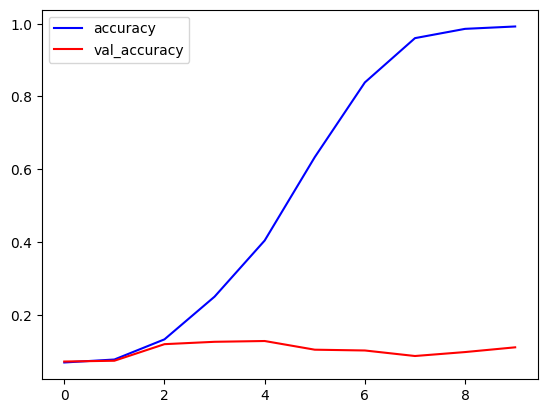

The train accuracy: 0.992395


In [49]:
import plotter
plotter.create_plot_keras(history, metric="accuracy" , validation=True)
#plotter.create_plot_keras(history, metric="loss" , validation=True)
print("The train accuracy: %f" %(history.history["accuracy"][-1]))

In [50]:
model.save("model.keras")

In [51]:
# Garbage collector
os.system("rm -rf dataset-encrypted")

0